In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
np.__version__

'1.18.1'

# Predicting  heart Disease Using ML

This notebook looks into using various python-based machine Learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart Disease based on their medical attributes

Following steps for problem solving:
1. Problem definition 
2. Data
3. Evaluation
4. features
5. Modelling 
6. Experimentation


## 1. Problem definition

In a statement ,
> Given clinical parameters about a patient ,can we predict whether or not they have heart Disease ?

## 2. Data

>the data is available on kaggle :https://www.kaggle.com/ronitf/heart-disease-uci



## 3. Features
 
**Create data Dictionary**

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
     * 0: Upsloping: better heart rate with excercise (uncommon)
     * 1: Flatsloping: minimal change (typical healthy heart)
     * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

 ## Preparing the tools 
    
  we're going to use ,Matplotlib,and Numpy for data analysis and manipulation  

In [3]:
# import all the tools we need 

# Regular EDA(explaratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as ctb

# we want our plots to appear inside the notebook
%matplotlib inline 

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score ,f1_score
from sklearn.metrics import plot_roc_curve 

## Load data

In [4]:
df = pd.read_csv("heart_disease.csv")
df.shape # rows and column

(303, 14)

## Data exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question are we trying to solve ?
2. What kind of data do we have and how do we treat different types?
3. what's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add ,change or remove feature to get more out of our data? 

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# Let's find out how many of each class are there

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

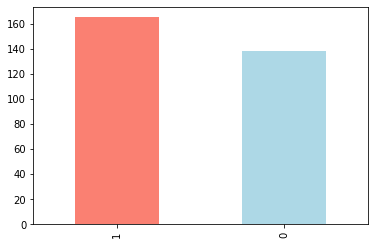

In [8]:
df["target"].value_counts().plot(kind = "bar",color = ["salmon", "lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
## imp: crosstab
# compare target column to sex column
pd.crosstab(df.target ,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


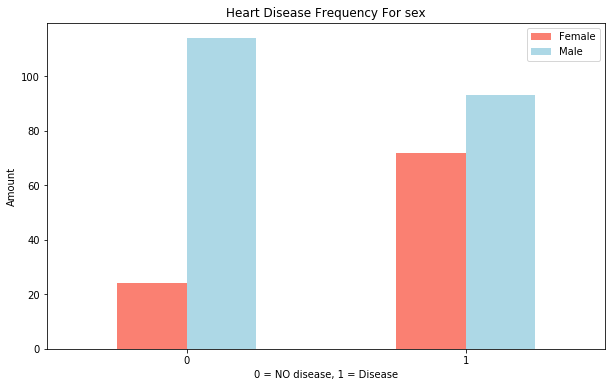

In [14]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                    figsize = (10,6),
                                    color =["salmon","lightblue"]);

plt.title("Heart Disease Frequency For sex")
plt.xlabel("0 = NO disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female" ,"Male"]);
plt.xticks(rotation =0);

In [15]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max.heart-rate for Heart-disease

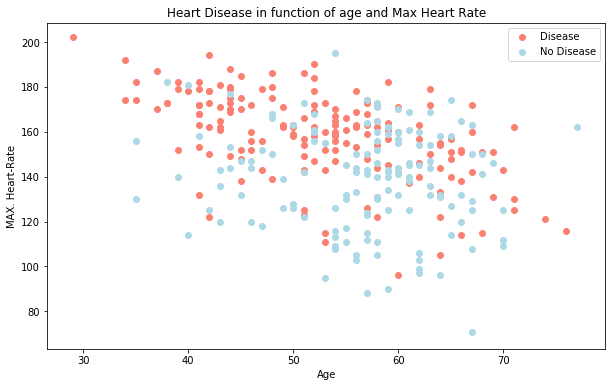

In [16]:
# Create another figure
plt.figure(figsize = (10,6))

# scatter with positive example
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            color = "salmon")

# scatter with negative example
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
             color = "lightblue");


# Add some helpful info
plt.title("Heart Disease in function of age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("MAX. Heart-Rate")
plt.legend(["Disease","No Disease"]);

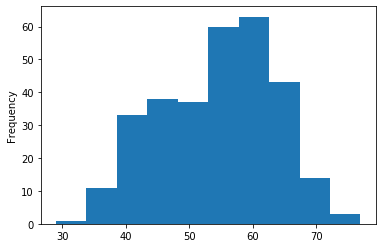

In [17]:
# Check Distribution of the age column with a histogram

df.age.plot.hist();

## Heart Disease Frequency per chest pain type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [18]:
pd.crosstab(df.cp ,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


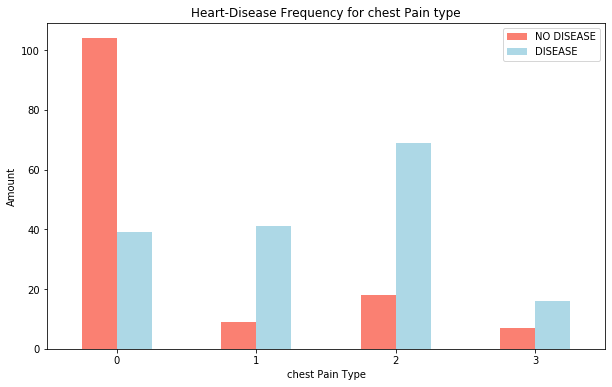

In [19]:
# Make the crosstab more visual
pd.crosstab(df.cp ,df.target).plot(kind = "bar",
                                   figsize = (10,6),
                                   color= ["salmon" , "lightblue"])

# Add some labels
plt.title("Heart-Disease Frequency for chest Pain type")
plt.xlabel("chest Pain Type")
plt.ylabel("Amount")
plt.legend(["NO DISEASE" ,"DISEASE"])
plt.xticks(rotation =0);

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Make a corelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


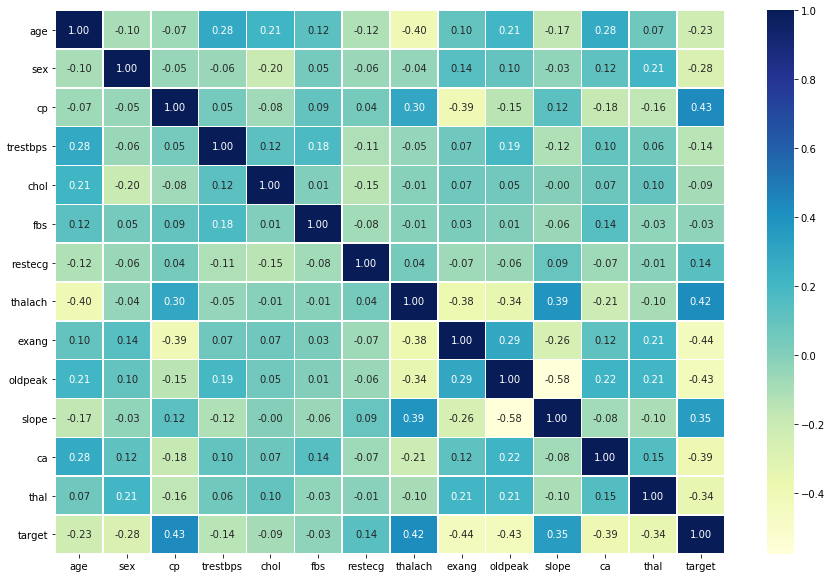

In [22]:
# Make correlation matrix visually informative
corr_matrix = df.corr()
fig,ax  =plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                  annot= True,
                 linewidth = 0.5,
                  fmt = ".2f",
                  cmap = "YlGnBu");

# A higher positive value means a potential positive correlation.
# A higher negative value means a potential negative correlation.
# Negative correlation is a relationship between two variables in which one variable increases as the other decreases

# means AS Cp goes up the target value also increases. 

### exang and target has negative correlation

## 5. MODELLING

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Split data into X and Y 
X = df.drop("target",axis= 1)
Y = df.target

In [25]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
# Splitting data into training and testing sets

np.random.seed(42)

# split into train and test sets
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size = 0.2)

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
Y_train ,len(Y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

we are going to try 3 different ML models for this classification problems.
> * Logistic Regression
> * K-Nearest Neighbours Classifier
> * Random Forest Classifier

In [30]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models ,X_train,X_test ,Y_train ,Y_test):
    """
    Fits and Evaluate given ML models.
    Models : a dict of different Scikit-learn ML models.
    X_train : training data (no labels)
    X_test : testing data(no labels)
    Y_train : traning data
    Y_test : testing data
    """
    
    # set Random seed
    np.random.seed(42)
    
    # make dictionary to keep model scores
    model_scores= {}
    
    # loop through the models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(X_train,Y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,Y_test)
        
    return model_scores 

In [31]:
model_scores = fit_and_score(models = models,
                             X_train =X_train,
                             Y_train = Y_train,
                             X_test = X_test,
                             Y_test = Y_test)

model_scores

C:\Users\shubham\Desktop\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## MODEL COMPARISON

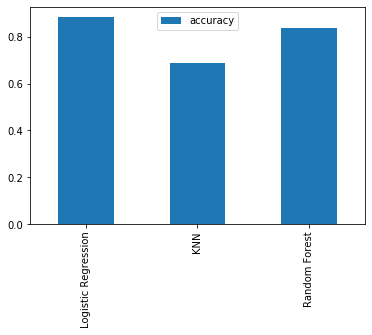

In [32]:
model_compare = pd.DataFrame(model_scores, index =["accuracy"])
# for all classifiers the default score matrix is accuracy

model_compare.T.plot.bar();

Now we've a baseline model... and we know a model's first predictions aren't always what we should based our next step off.

so we'll look at the following

* Hyperparameter Tuning
* Feature importance
* Confusion matrix
* Cross-validation
* precision
* Recall 
* F1 score
* Classifiaction report
* ROC Curve
* Area Under the Curve(AUC)

## Hyperparameter tuning 

In [33]:
# Let's tune KNN

train_scores= []
test_scores = []

# Create a list of different values for n_neighbours since the default no of neighbours are "5"
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train,Y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train ,Y_train))
    
    #update the test scores list
    test_scores.append(knn.score(X_test,Y_test))

In [34]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [35]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data : 75.41%


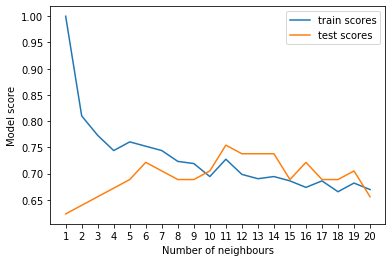

In [36]:
plt.plot(neighbors , train_scores ,label = "train scores")
plt.plot(neighbors ,test_scores ,label = "test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data : {max(test_scores)*100 :.2f}%")

## Hyperparameter Tuning with RandomizedSearchCV

We're going to tune :
* Logistic Regression()
* RandomForestClassifier()
....using RandomizedSearchCV

In [37]:
# Create a hyperparameters grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver" :["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid ={ "n_estimators" :np.arange(10,1000 ,50),
           "max_depth" :[None,3,5 ,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf" :np.arange(1,20,2)}

Now we've got hypeerparameters grids for each of our models, let's tune them using RandomizedSearchCV

In [38]:
# Tune logisticRegression

np.random.seed(42)

# setup random hyperparameter search For LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [40]:
rs_log_reg.score(X_test,Y_test)
# Since even after tuning the result is not improved

0.8852459016393442

Now we've tuned Logisticegression(),let's do the same for RandomForestClassifier()..

In [41]:
# setup random seed
np.random.seed(42)

# Setup Random hyperparameters search for Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv= 5 , 
                            n_iter = 20 , 
                            verbose = True)
# Fit Random hyperparameter search model for randomForestClassifier()
rs_rf.fit(X_train,Y_train)   

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [42]:
# Find the best hyperparameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [43]:
# Evaluate the Randomized search RAndomForestClassifier model
rs_rf.score(X_test,Y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far ,we'll try and improve them
again using GridSearchCV

In [44]:
# Different hyperparameters for our Logistic model

log_reg_grid = {"C" : np.logspace(-4,4,30),
                 "solver": ["liblinear"]}
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid, # in randomizedsearchCV it is param_distribution 
                          cv = 5, # no iter as grid search iterate over all possible values 
                           verbose = True)\

# Fit Grid Hyperparameters Search model
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [45]:
# check the best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
#Evaluate the grid Search Logistic Regression model
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

## saving the model

In [47]:
pickle_out = open("heart_disease.pkl", mode = "wb") 
pickle.dump(gs_log_reg, pickle_out) 
pickle_out.close()

### Let's improve this score using CATBoost

In [48]:
# fitting a model to the data

np.random.seed(42)
model_CB = ctb.CatBoostClassifier()
model_CB.fit(X_train,Y_train);

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 147ms	remaining: 2m 27s
1:	learn: 0.6846992	total: 149ms	remaining: 1m 14s
2:	learn: 0.6804482	total: 150ms	remaining: 50s
3:	learn: 0.6762280	total: 152ms	remaining: 37.8s
4:	learn: 0.6716854	total: 154ms	remaining: 30.5s
5:	learn: 0.6672902	total: 155ms	remaining: 25.7s
6:	learn: 0.6640072	total: 157ms	remaining: 22.3s
7:	learn: 0.6602127	total: 159ms	remaining: 19.7s
8:	learn: 0.6563948	total: 162ms	remaining: 17.8s
9:	learn: 0.6525316	total: 164ms	remaining: 16.3s
10:	learn: 0.6483925	total: 166ms	remaining: 14.9s
11:	learn: 0.6449119	total: 167ms	remaining: 13.8s
12:	learn: 0.6413090	total: 169ms	remaining: 12.8s
13:	learn: 0.6374641	total: 171ms	remaining: 12s
14:	learn: 0.6335822	total: 172ms	remaining: 11.3s
15:	learn: 0.6288496	total: 173ms	remaining: 10.7s
16:	learn: 0.6250951	total: 175ms	remaining: 10.1s
17:	learn: 0.6209988	total: 178ms	remaining: 9.69s
18:	learn: 0.6182407	total: 180ms	remaining: 9.31s
19:	learn: 0.

191:	learn: 0.3311233	total: 467ms	remaining: 1.96s
192:	learn: 0.3301187	total: 469ms	remaining: 1.96s
193:	learn: 0.3294087	total: 471ms	remaining: 1.96s
194:	learn: 0.3287585	total: 474ms	remaining: 1.96s
195:	learn: 0.3276402	total: 475ms	remaining: 1.95s
196:	learn: 0.3268327	total: 478ms	remaining: 1.95s
197:	learn: 0.3260096	total: 479ms	remaining: 1.94s
198:	learn: 0.3250287	total: 481ms	remaining: 1.94s
199:	learn: 0.3246849	total: 483ms	remaining: 1.93s
200:	learn: 0.3239244	total: 485ms	remaining: 1.93s
201:	learn: 0.3230601	total: 487ms	remaining: 1.92s
202:	learn: 0.3218867	total: 489ms	remaining: 1.92s
203:	learn: 0.3211467	total: 490ms	remaining: 1.91s
204:	learn: 0.3207712	total: 492ms	remaining: 1.91s
205:	learn: 0.3199743	total: 493ms	remaining: 1.9s
206:	learn: 0.3192023	total: 494ms	remaining: 1.89s
207:	learn: 0.3183557	total: 496ms	remaining: 1.89s
208:	learn: 0.3176068	total: 497ms	remaining: 1.88s
209:	learn: 0.3167791	total: 498ms	remaining: 1.87s
210:	learn: 0

390:	learn: 0.2257620	total: 757ms	remaining: 1.18s
391:	learn: 0.2254125	total: 759ms	remaining: 1.18s
392:	learn: 0.2250504	total: 761ms	remaining: 1.18s
393:	learn: 0.2248149	total: 762ms	remaining: 1.17s
394:	learn: 0.2245912	total: 764ms	remaining: 1.17s
395:	learn: 0.2242488	total: 765ms	remaining: 1.17s
396:	learn: 0.2240126	total: 767ms	remaining: 1.16s
397:	learn: 0.2237290	total: 768ms	remaining: 1.16s
398:	learn: 0.2235486	total: 770ms	remaining: 1.16s
399:	learn: 0.2230899	total: 771ms	remaining: 1.16s
400:	learn: 0.2227817	total: 773ms	remaining: 1.15s
401:	learn: 0.2224752	total: 774ms	remaining: 1.15s
402:	learn: 0.2221171	total: 775ms	remaining: 1.15s
403:	learn: 0.2216990	total: 777ms	remaining: 1.15s
404:	learn: 0.2212887	total: 778ms	remaining: 1.14s
405:	learn: 0.2210836	total: 779ms	remaining: 1.14s
406:	learn: 0.2206963	total: 780ms	remaining: 1.14s
407:	learn: 0.2204430	total: 781ms	remaining: 1.13s
408:	learn: 0.2200194	total: 783ms	remaining: 1.13s
409:	learn: 

598:	learn: 0.1693630	total: 1.04s	remaining: 700ms
599:	learn: 0.1692529	total: 1.05s	remaining: 698ms
600:	learn: 0.1691730	total: 1.05s	remaining: 697ms
601:	learn: 0.1689899	total: 1.05s	remaining: 695ms
602:	learn: 0.1686613	total: 1.05s	remaining: 694ms
603:	learn: 0.1684002	total: 1.05s	remaining: 692ms
604:	learn: 0.1682152	total: 1.06s	remaining: 690ms
605:	learn: 0.1680343	total: 1.06s	remaining: 688ms
606:	learn: 0.1677642	total: 1.06s	remaining: 686ms
607:	learn: 0.1676470	total: 1.06s	remaining: 684ms
608:	learn: 0.1675305	total: 1.06s	remaining: 682ms
609:	learn: 0.1671817	total: 1.06s	remaining: 680ms
610:	learn: 0.1671398	total: 1.06s	remaining: 678ms
611:	learn: 0.1670068	total: 1.06s	remaining: 676ms
612:	learn: 0.1668815	total: 1.07s	remaining: 674ms
613:	learn: 0.1666197	total: 1.07s	remaining: 672ms
614:	learn: 0.1663885	total: 1.07s	remaining: 670ms
615:	learn: 0.1661393	total: 1.07s	remaining: 668ms
616:	learn: 0.1659556	total: 1.07s	remaining: 666ms
617:	learn: 

785:	learn: 0.1349791	total: 1.33s	remaining: 363ms
786:	learn: 0.1349530	total: 1.33s	remaining: 362ms
787:	learn: 0.1346817	total: 1.34s	remaining: 360ms
788:	learn: 0.1345395	total: 1.34s	remaining: 358ms
789:	learn: 0.1344147	total: 1.34s	remaining: 357ms
790:	learn: 0.1342791	total: 1.34s	remaining: 355ms
791:	learn: 0.1341896	total: 1.34s	remaining: 353ms
792:	learn: 0.1340659	total: 1.34s	remaining: 351ms
793:	learn: 0.1339301	total: 1.35s	remaining: 350ms
794:	learn: 0.1337165	total: 1.35s	remaining: 348ms
795:	learn: 0.1336322	total: 1.35s	remaining: 346ms
796:	learn: 0.1334556	total: 1.35s	remaining: 344ms
797:	learn: 0.1332550	total: 1.35s	remaining: 343ms
798:	learn: 0.1330375	total: 1.35s	remaining: 341ms
799:	learn: 0.1329078	total: 1.36s	remaining: 339ms
800:	learn: 0.1327460	total: 1.36s	remaining: 338ms
801:	learn: 0.1326160	total: 1.36s	remaining: 336ms
802:	learn: 0.1324963	total: 1.36s	remaining: 334ms
803:	learn: 0.1322169	total: 1.36s	remaining: 332ms
804:	learn: 

In [49]:
#making Prediction
np.random.seed(42)
expected_y = Y_test
predicted_y = model_CB.predict(X_test)

In [50]:
model_CB.score(X_test,Y_test)

0.8360655737704918

In [51]:
# summarizing the fit of the model
np.random.seed(42)
print() 
print(classification_report(expected_y, predicted_y))



              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



[[24  5]
 [ 5 27]]


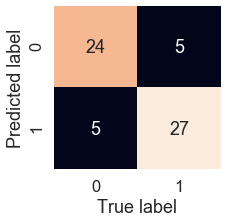

In [52]:
print(confusion_matrix(expected_y, predicted_y));


# Visualizing confusion matrix using seaborn
sns.set(font_scale = 1.5)


def plot_conf_mat(expected_y, predicted_y):
    fig,ax = plt.subplots(figsize= (3,3))
    ax = sns.heatmap(confusion_matrix(expected_y,predicted_y),
                     annot = True,
                     cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(expected_y,predicted_y)    

### Evaluating our tuned ML classifier,beyond accuracy

* ROC Curve and AUC score
* Confusion matrix
* Classification report
* precision
* Recall
* F!-score

.. and it would be great if cross-validation was used where possible.

To make comparison and evaluate our trained model,first we need to make predictions.

In [53]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [54]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [55]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

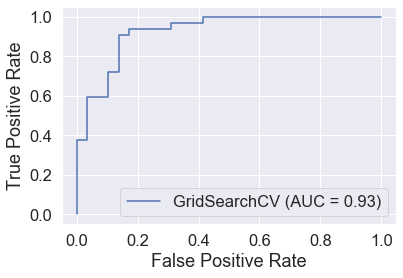

In [56]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test,Y_test)

In [57]:
# Confusion matrix 
print(confusion_matrix(Y_test, y_preds))

[[25  4]
 [ 3 29]]


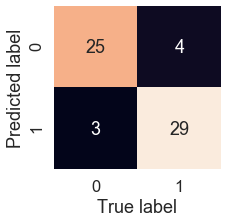

In [58]:
# Visualizing confusion matrix using seaborn
sns.set(font_scale = 1.5)


def plot_conf_mat(Y_test, y_preds):
    fig,ax = plt.subplots(figsize= (3,3))
    ax = sns.heatmap(confusion_matrix(Y_test,y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(Y_test,y_preds)    

Now we've got a ROC curve ,an AUC metric and a confusion matrix ,Let's get a classification report as well as cross-validated precision ,recall and f1-score 

In [59]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation matrix using Cross validation 

we're going to calculate accuracy ,precision ,recall and f1-score of our model using cross-validation and to  do  so  we'll be using cross_val_score 

In [60]:
# Check best hyparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [61]:
# Create a new Classifier with best parameters
clf = LogisticRegression(C = 0.2043397175869418,
                          solver = "liblinear")

In [62]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, 
                              X, 
                              Y,
                              cv= 5 ,
                               scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [63]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [64]:
# Cross-validated precision
cv_pre = cross_val_score(clf, 
                              X, 
                              Y,
                              cv= 5 ,
                               scoring = "precision")
cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [65]:
cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [66]:
# Cross-validated recall
cv_recall = cross_val_score(clf, 
                              X, 
                              Y,
                              cv= 5 ,
                               scoring = "recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [67]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [68]:
# cross-validated f1-score
cv_f1_score = cross_val_score(clf, 
                              X, 
                              Y,
                              cv= 5 ,
                               scoring = "f1")
cv_f1_score

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [69]:
cv_f1_score = np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

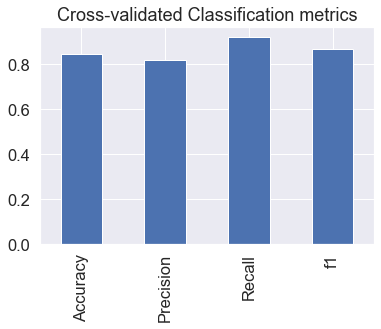

In [70]:
# Visualize our Cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" :cv_acc,
                           "Precision": cv_pre,
                           "Recall" : cv_recall,
                            "f1" : cv_f1_score},
                            index = [0])

cv_metrics.T.plot.bar(title = "Cross-validated Classification metrics", 
                 legend = False);

### Feature Importance 

Feature importance is another way as asking ,"Which features contibuted most to the outcomess of the model nad how did they contibute ?
Finding Feature importance is different For each ML model .One way to find feature importance is to search for "(MODEL NAME) feature importance".

In [71]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C = 0.20433597178569418,
                         solver= "liblinear")
clf.fit(X_train,Y_train);

In [72]:
# Check coefficient
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [73]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
# match coef's of feature to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

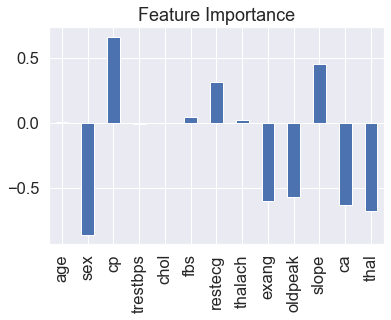

In [75]:
# Visulaize Feature importance
feature_df= pd.DataFrame(feature_dict ,index = [0])
feature_df.T.plot.bar(title = "Feature Importance" , legend = False);

In [76]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [77]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### slope - the slope of the peak exercise ST segment
   * 0: Upsloping: better heart rate with excercise (uncommon)
   * 1: Flatsloping: minimal change (typical healthy heart)
   * 2: Downslopins: signs of unhealthy heart

# Result

## We are able to achieve more than 88% of accuracy using Logistic Regression in our  Heart-Disease Analysis Classification Model

# Deployment of model

Create data dictionary
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
     * 0: Upsloping: better heart rate with excercise (uncommon)
     * 1: Flatsloping: minimal change (typical healthy heart)
     * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising


In [111]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
# !pip install -q pyngrok

# !pip install -q streamlit

# !pip install -q streamlit_ace

In [9]:
%%writefile app.py
 
import pickle
import streamlit as st
import warnings
warnings.filterwarnings('ignore')
# loading the trained model
pickle_in = open('heart_disease.pkl','rb') 
classifier = pickle.load(pickle_in)

# @st.cache()

# defining the function which will make the prediction using the data which the user inputs 
def prediction(age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal):
    #preprocessing user input
    
    if sex == 'Male':
        sex = 1
    else:
        sex =0
        
    if fbs == "true":
        fbs = 1
    else:
        fbs = 0
    
    if exang == "true":
        exang = 1
    else:
        exang = 0
    
   # Making predictions 
    prediction = classifier.predict([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]])
    
    if prediction == 0:
        pred = 'No Heart Issue!! You are Healthy :)'
    else:
        pred = 'Heart Issue Detected !! See Your Doctor'
    return pred


# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    st.title("Heart-Disease Detector")
    html_temp = """ 
    <div style ="background-color:tomato;padding:13px"> 
    <h2 style ="color:white;text-align:center;"> Heart-disease Classifier </h2> 
    </div> 
    """
    with st.sidebar:
      if st.button("About"):
          st.text("Visit [Github](https://github.com/celestial-shubham/ML-project)!!")
          st.text("By Shubham Verma")
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    age = st.number_input("Enter Your Age :", min_value=1, max_value=100, value=50, step=1)
    sex = st.selectbox('sex',("Male","Female"))
    exang = st.selectbox('Do you Feel Exercise induced Anigma ?',("true","false")) 
    fbs = st.selectbox('is your fasting blood sugar > 120 mg/dl ?',("true","false")) 
    cp = st.number_input("chest pain type : \n Enter 0: Typical angina: chest pain related decrease blood supply to the heart \n Enter 1: Atypical angina: chest pain not related to heart\nEnter 2: Non-anginal pain: typically esophageal spasms (non heart related)\nEnter 3: Asymptomatic: chest pain not showing signs of disease", min_value=1, max_value=3, value=1, step=1)
    trestbps = st.number_input("resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern", min_value=50, max_value=200, value=90, step=1)
    chol = st.number_input("cholestoral in mg/dl \n above 200 is cause for concern",min_value = 120,max_value = 250,value = 210,step =2)
    restecg = st.number_input("Resting Electrocardiographic results:: \n Enter 0 :Nothing to note \n Enter 1:ST-T Wave abnormality \n Enter 2:Possible or definite left ventricular hypertroph", min_value=0, max_value=2, value=0, step=1)
    thalach = st.number_input("Maximum heart rate achieved", min_value=20, max_value=200, value=60, step=1)
    oldpeak = st.number_input('ST depression induced by exercise',min_value = 0.1 ,max_value =7.0,value=1.0,step=0.2)
    slope = st.number_input('the slope of the peak exercise ST segment:: \n Enter 0: Upsloping: better heart rate with excercise (uncommon)\n Enter 1: Flatsloping: minimal change (typical healthy heart) \n Enter 2: Downslopins: signs of unhealthy heart', min_value=0, max_value=2, value=0, step=1)
    ca = st.number_input('number of major vessels (0-3) colored by flourosopy', min_value=0, max_value=3, value=1, step=1)
    thal = st.number_input('thalium stress result \n Enter (1-3): normal \n Enter 6: fixed defect: used to be defect but ok now \n Enter 7: reversable defect: no proper blood movement when excercising', min_value=1, max_value=7, value=1, step=1)
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Report"): 
        result = prediction(age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal) 
        st.success('Your Report Says {}'.format(result))
        st.balloons()
     
if __name__=='__main__':
    main()

Overwriting app.py


In [10]:
from pyngrok import ngrok


public_url = ngrok.connect('8501')
public_url


t=2021-06-16T12:46:38+0530 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=7022f8c85b6361f4 err="Your account may not run more than 2 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\ntn_1u1KGx2vPx5wn7RCJKKmi04GbIk, tn_1u1KGyDZmg3F5shkh3vULH566Sj\n\r\n\r\nERR_NGROK_324\r\n"


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"Your account may not run more than 2 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\ntn_1u1KGx2vPx5wn7RCJKKmi04GbIk, tn_1u1KGyDZmg3F5shkh3vULH566Sj\n\r\n\r\nERR_NGROK_324\r\n"}}
